### <span style="color:navy"> Southern Water Corp Python Case Study</span> - Regina Bauernschmidt

In this case study, I used multivariate regression to predict pump failure for Southern Water Corps.

---

### Part I: <span style="color:blue">Descriptive Statistics</span>

In [192]:
#Import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

#Set chart style and parameters
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)


### <span style="color:green">Descriptive Statistics</span> 
The data from Southern Water Corp has been split into two files.
* The first file, titled DF_Raw_Data contains all the 'raw' Pump Data.
* The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data.

In [193]:
# Import data sources
dataframe_raw = pd.read_csv('DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('DF_Rolling_Stdev.csv')

# Descriptive statistics
print(dataframe_raw.describe())
print(dataframe_stdev.describe())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

<b> Insights:</b>
* The standard deviation dataset has smaller means and variance than the raw dataset.
* Pump Torque, Pump Speed, Ambient Temperature, and Pump Efficiency have a relatively large variance.

---------------------------------------------------------------------------

### <span style="color:green">Boxplots and Line Plots</span> 


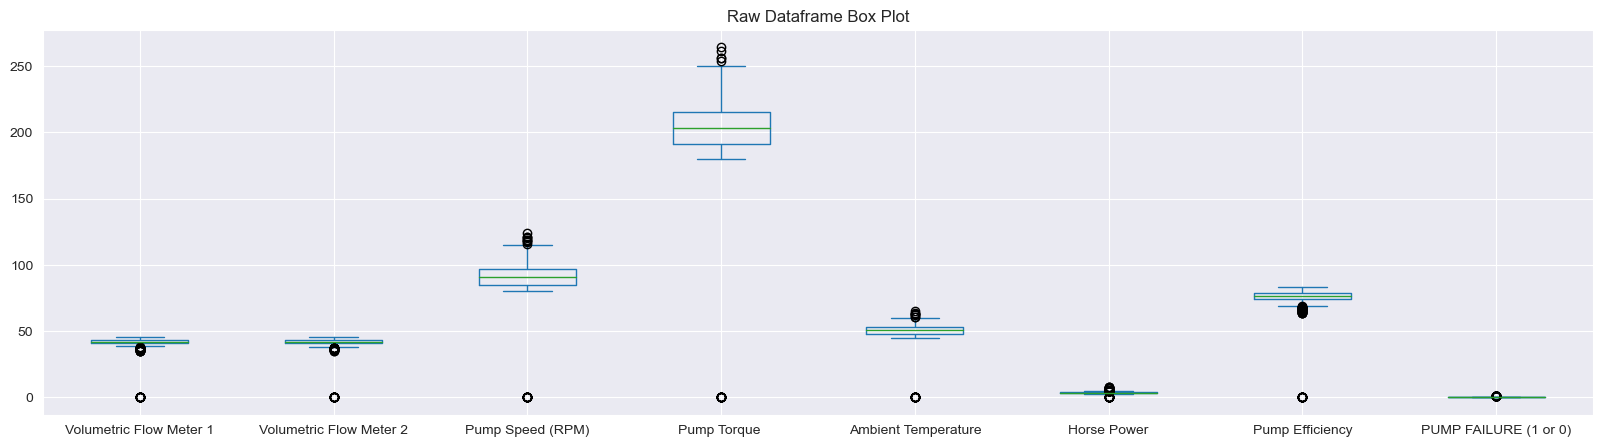

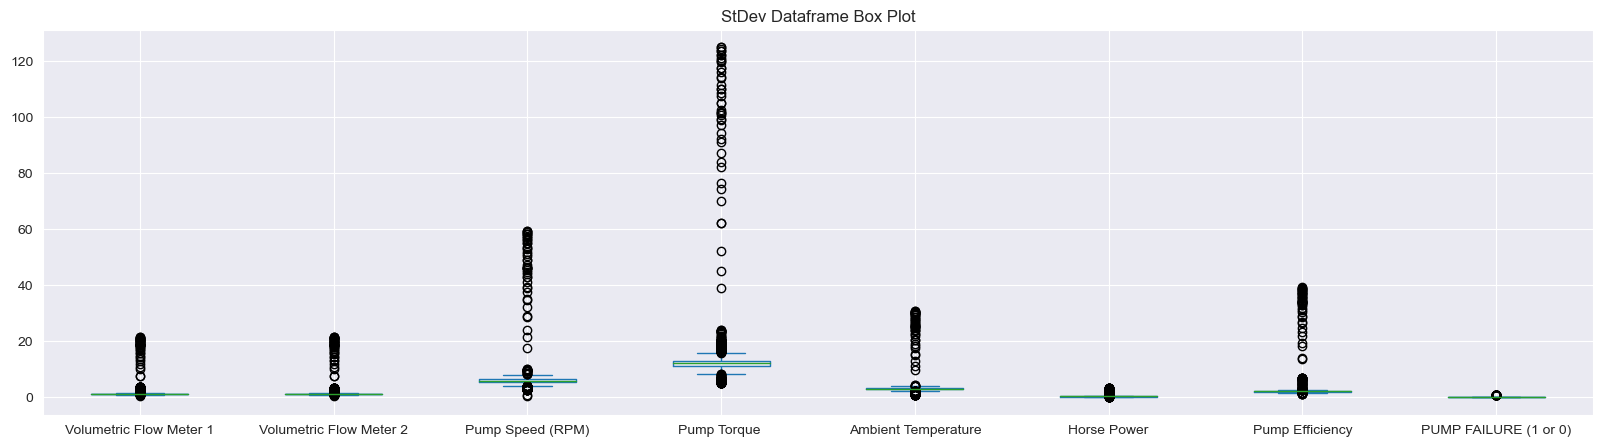

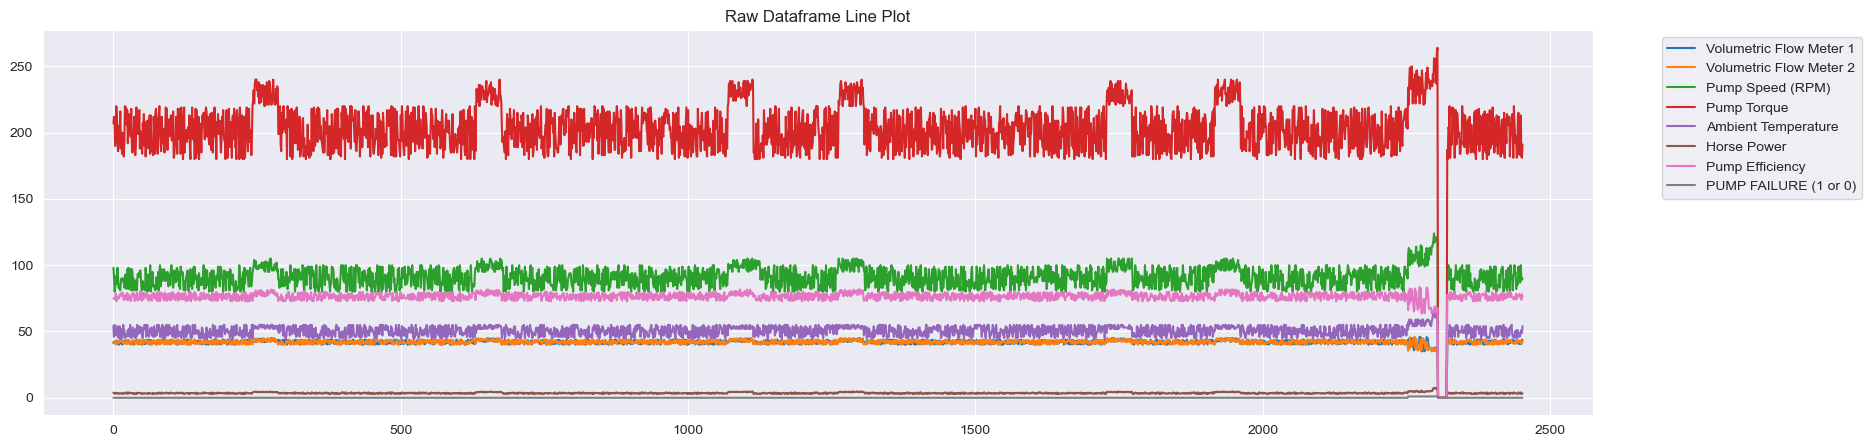

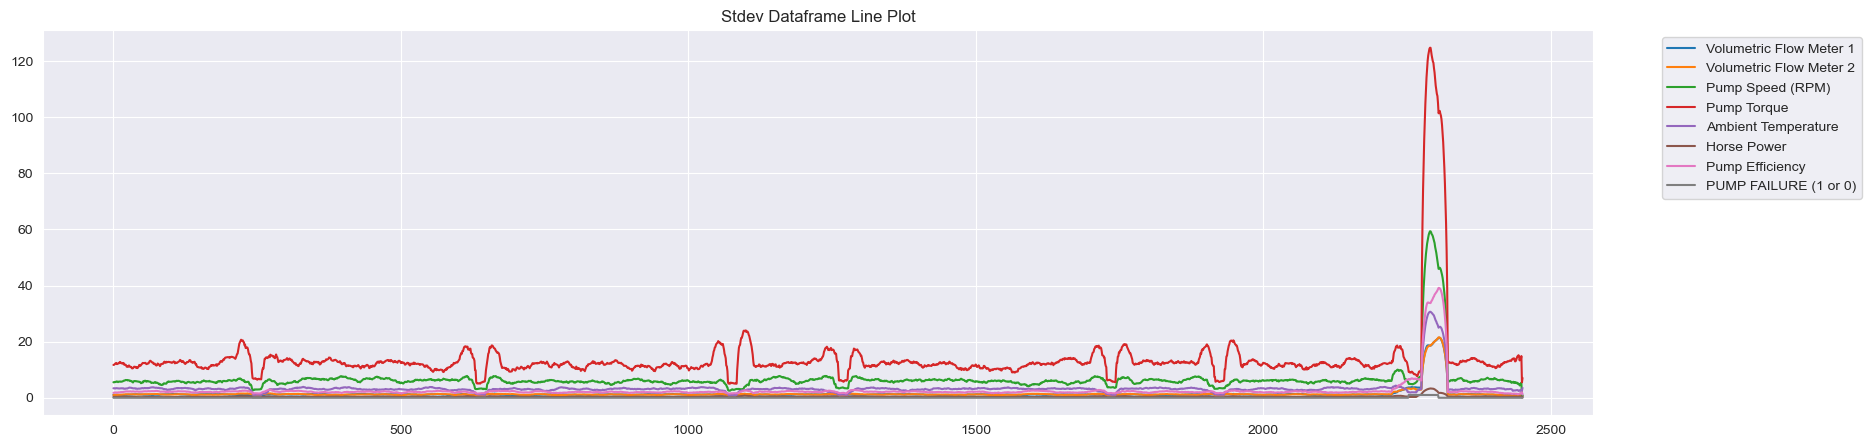

In [194]:
# Boxplot for both dataframes
dataframe_raw.plot(kind='box')
plt.title("Raw Dataframe Box Plot")
plt.show()
dataframe_stdev.plot(kind='box')
plt.title("StDev Dataframe Box Plot")
plt.show()

# Line plots for both dataframes
dataframe_raw.plot(kind='line')
plt.title("Raw Dataframe Line Plot")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
dataframe_stdev.plot(kind='line')
plt.title("Stdev Dataframe Line Plot")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

<b> Insights:</b>
* There is much less variance in the standard deviation model.
* The standard deviation dataset spikes near the time pump failure occurs.

---------------------------------------------------------------------------

### <span style="color:green">Filtered DataFrames with Box Plots</span> 

Datasets contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  

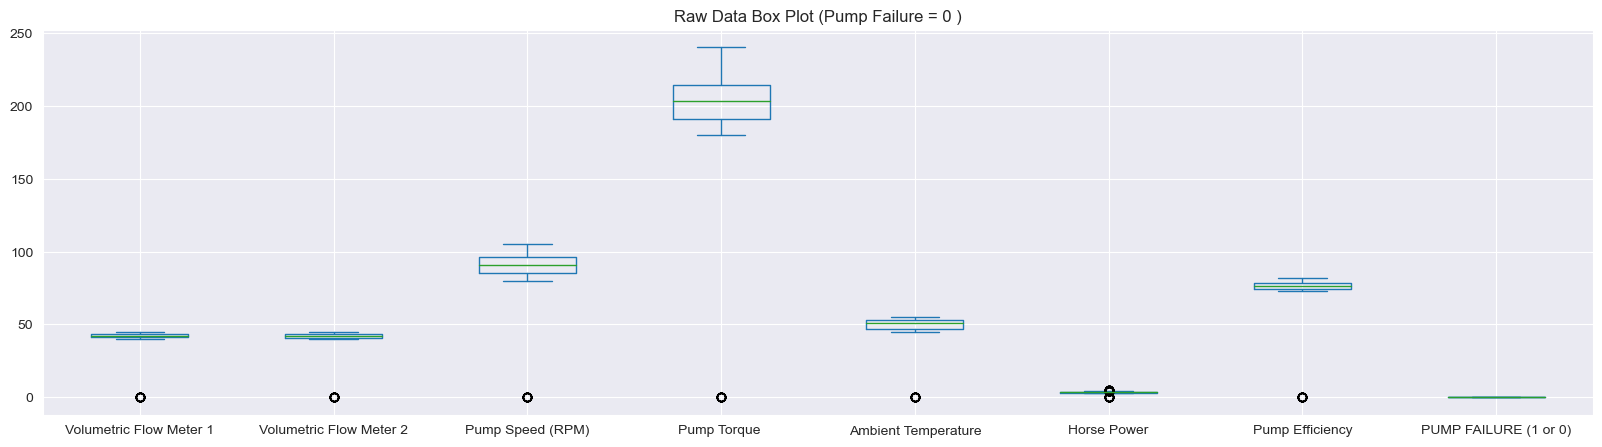

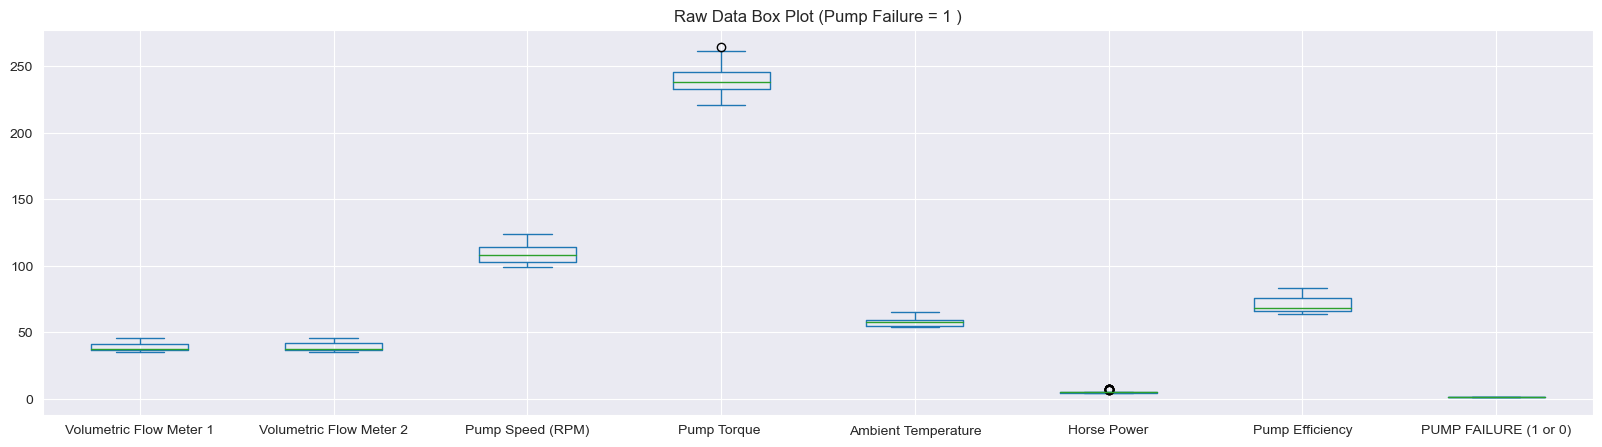

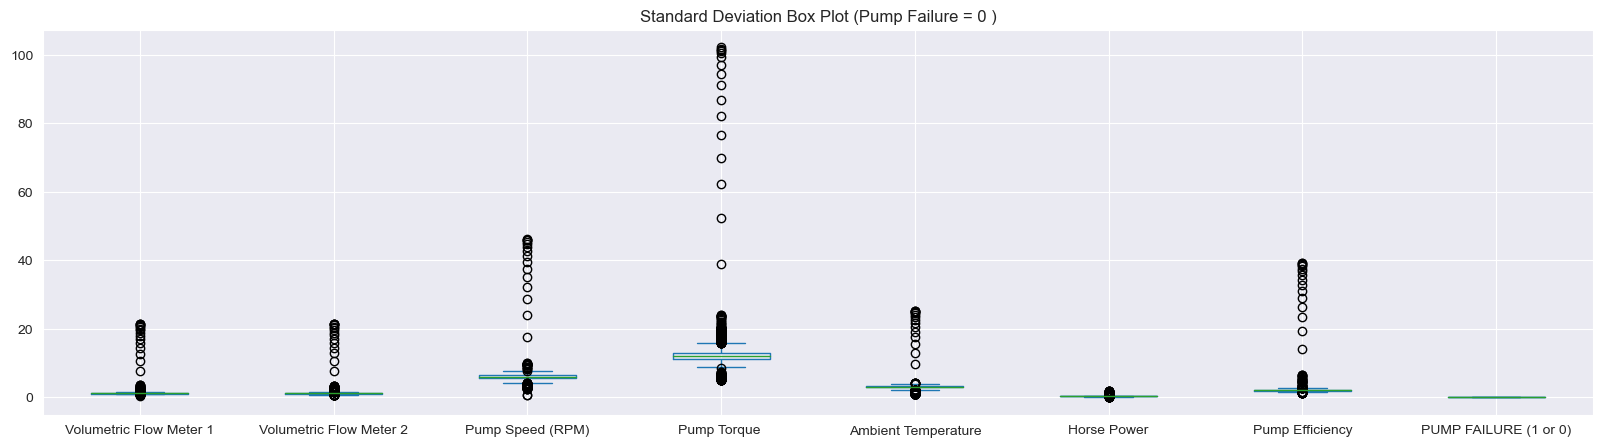

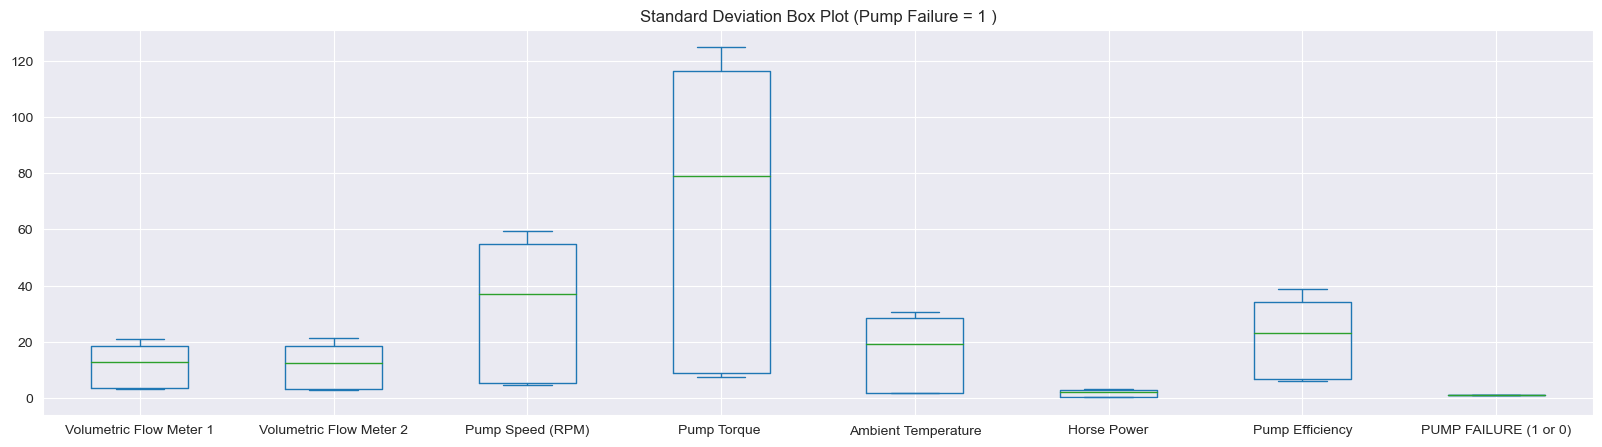

In [195]:
dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)']==0].plot(kind='box')
plt.title("Raw Data Box Plot (Pump Failure = 0 )")
plt.show()

dataframe_raw[dataframe_raw['PUMP FAILURE (1 or 0)']==1].plot(kind='box')
plt.title("Raw Data Box Plot (Pump Failure = 1 )")
plt.show()

dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)']==0].plot(kind='box')
plt.title("Standard Deviation Box Plot (Pump Failure = 0 )")
plt.show()

dataframe_stdev[dataframe_stdev['PUMP FAILURE (1 or 0)']==1].plot(kind='box')
plt.title("Standard Deviation Box Plot (Pump Failure = 1 )")
plt.show()

<b>Insights</b>
* The IQRS are notable different when the pump has failed.
* The variance for all variables increases with pump failure under the standard deviation model.

---------------------------------------------------------------------------

### <span style="color:green">Define Quartiles</span> 

In [196]:
# Define quartile variables Q1 and Q3
Q1 = dataframe_raw.quantile(.25)
Q3 = dataframe_raw.quantile(.75)

# Calculate and print Interquartile Range
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


---------------------------------------------------------------------------

### <span style="color:green">Define Outliers</span> 
    

In [197]:
# Define Limits
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

# Define and count outliers
Outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit ))).any(axis=1)]
print (len(Outliers))

# Define percentage of data without outliers
Percentage_Outliers = 1 - (len(Outliers)/len(dataframe_raw))
print (round((Percentage_Outliers),2))

95
0.96


/var/folders/my/y134y43503b09rszt8s2w_k40000gn/T/ipykernel_63999/1208733242.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit ))).any(axis=1)]


---------------------------------------------------------------------------

/var/folders/my/y134y43503b09rszt8s2w_k40000gn/T/ipykernel_63999/1890926524.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit ))).any(axis=1)]


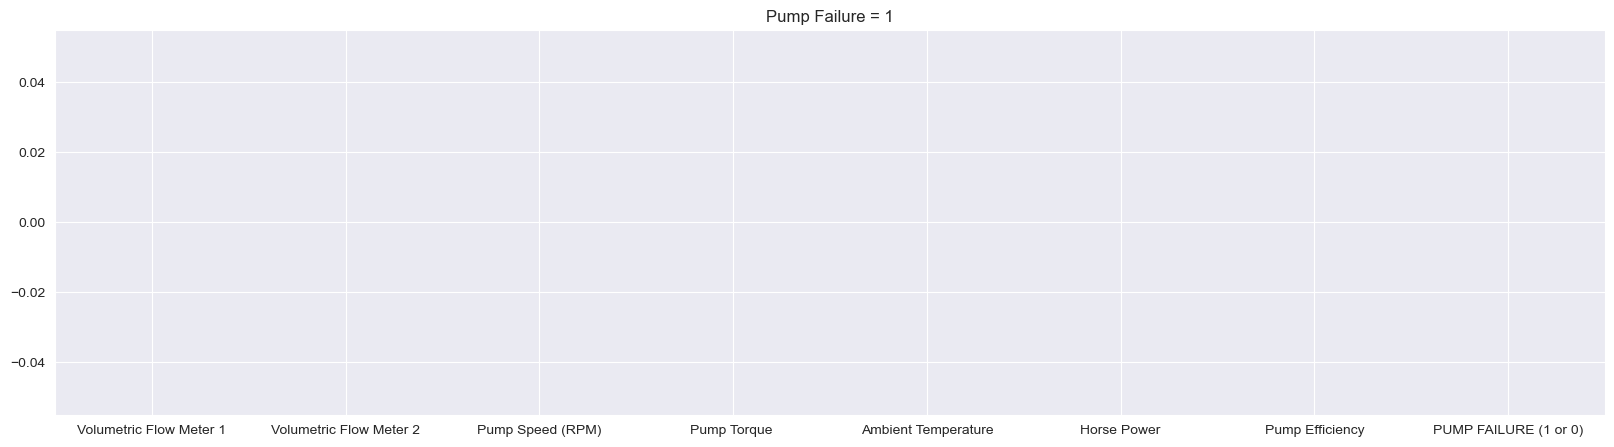

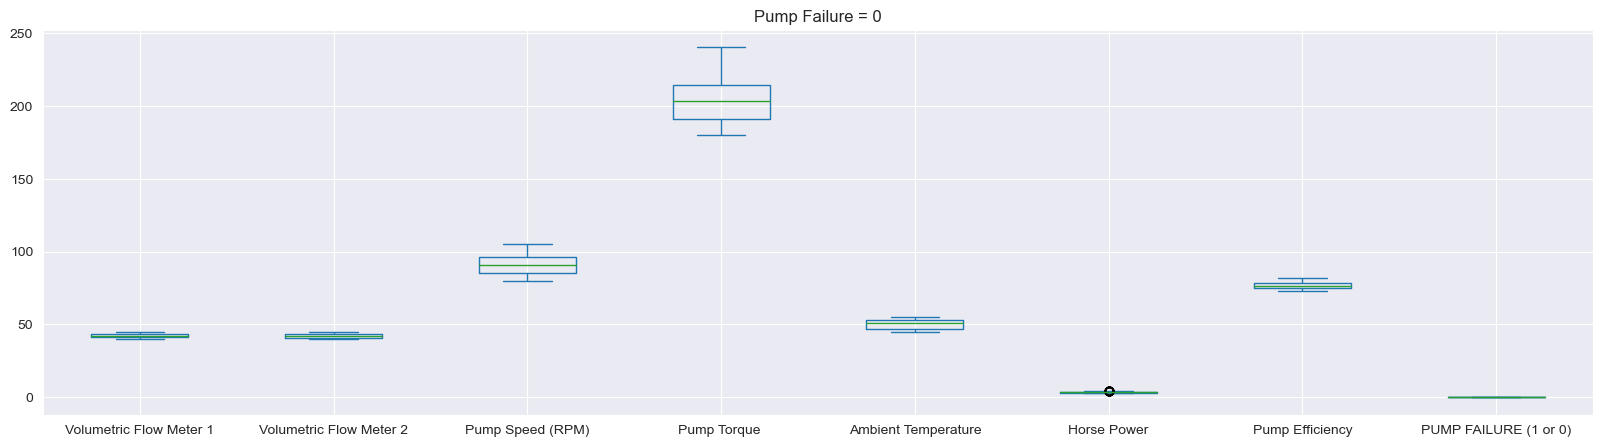

In [198]:
no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit ))).any(axis=1)]

# Remove outliers
condition_1 = no_outliers['PUMP FAILURE (1 or 0)']== 1
dataframe_1 = no_outliers[condition_1] 

# Box plot with Pump Failure
dataframe_1.plot(kind='box')
plt.title("Pump Failure = 1")
plt.show()

condition_0 = no_outliers['PUMP FAILURE (1 or 0)']== 0
dataframe_0 = no_outliers[condition_0] 
dataframe_0.plot(kind='box')
plt.title("Pump Failure = 0")
plt.show()

<b>Insights</b>
* There are 95 outliers making up around 4% of our data.
* When the outliers are removed it takes away the data with pump failures. Since this is what we are trying to predict, this would be problematic and outliers will remain in the data.

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

### <span style="color:purple">Heatmap (Raw Data)</span> 

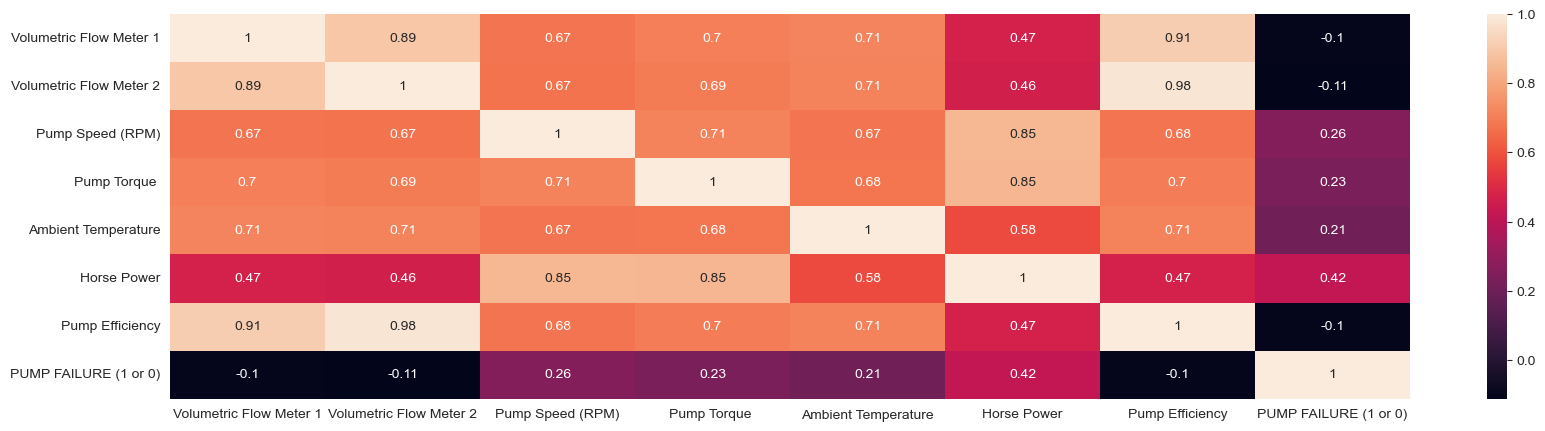

In [199]:
# Heatmap of raw data
rawheat = sns.heatmap(dataframe_raw.corr(), annot=True)
plt.show()

<b>Insights</b>
* Pump Failure is most correlated to Horse Power (.42)
* Pump Failure also has notable correlations to Pump Speed (.26), Pump Torque (.23), and Ambient Temperature (.21).

---

### <span style="color:purple">Heatmap (Rolling Standard Deviation) </span> 



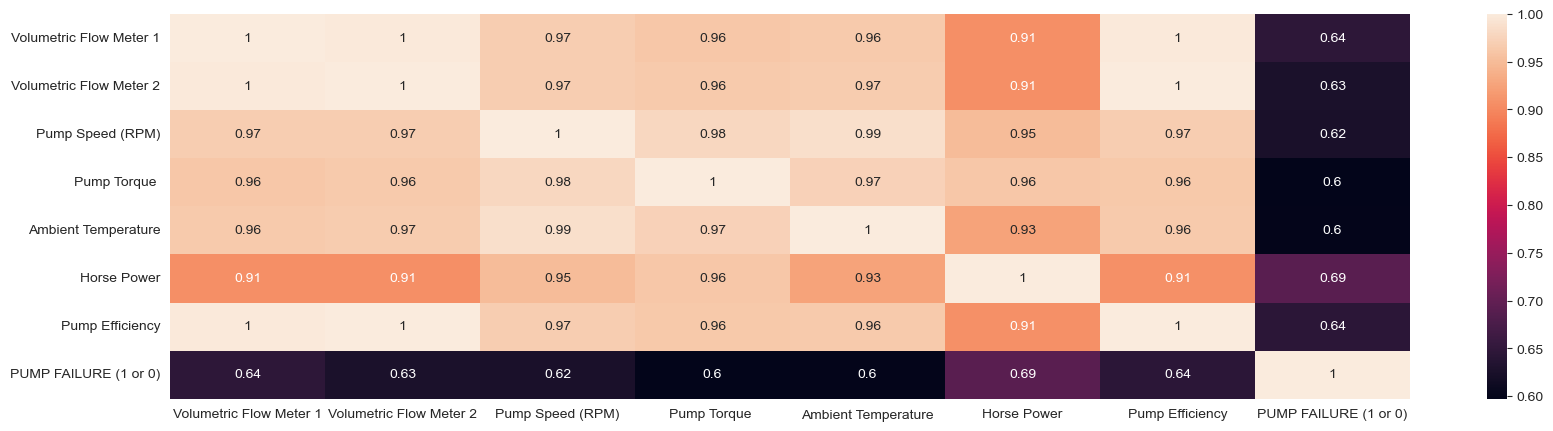

In [200]:
rawheat = sns.heatmap(dataframe_stdev.corr(), annot=True)
plt.show()

<b>Insights</b>
* Horse Power is most correlated to Pump Failure (.69) in the StDev model.
* Other notable correlations are Pump Efficiency (.64) and Volumetric Flow Meter 1 (.64).

### Creating and Comparing Multivariate Regression Models


In [201]:
# Raw independent variables
independent_variables = dataframe_raw[['Volumetric Flow Meter 1',
'Volumetric Flow Meter 2',
'Pump Speed (RPM)',
'Ambient Temperature',
'Horse Power',
'Pump Efficiency',
'Pump Torque ']]

# Raw indendent variable
dependent_variables = dataframe_raw['PUMP FAILURE (1 or 0)']

# Add a constant variable
independent_variables = sm.add_constant(independent_variables)

# Store and fit regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit() 

# Summarize regression statistics
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Thu, 14 Sep 2023   Prob (F-statistic):          5.58e-233
Time:                           17:17:26   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
# St Dev independent variables
independent_variables = dataframe_stdev[['Volumetric Flow Meter 1',
'Volumetric Flow Meter 2',
'Pump Speed (RPM)',
'Ambient Temperature',
'Horse Power',
'Pump Efficiency',
'Pump Torque ']]

# St Dev dependent variables
dependent_variables = dataframe_stdev['PUMP FAILURE (1 or 0)']

# Add a constant variable
independent_variables = sm.add_constant(independent_variables)

# Store and fit regression model
regression_model = sm.OLS(dependent_variables,independent_variables).fit() 

# Summarize regression statistics
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                           17:17:27   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Insights</b>
* The model using rolling standard deviation has a much higher R Squared (.778) than the model with raw data (.362).
* We will therefore use the rolling standard deviation model for our predictive analysis as it is much more significant.

### <span style="color:purple">Analysis of Coefficients </span>



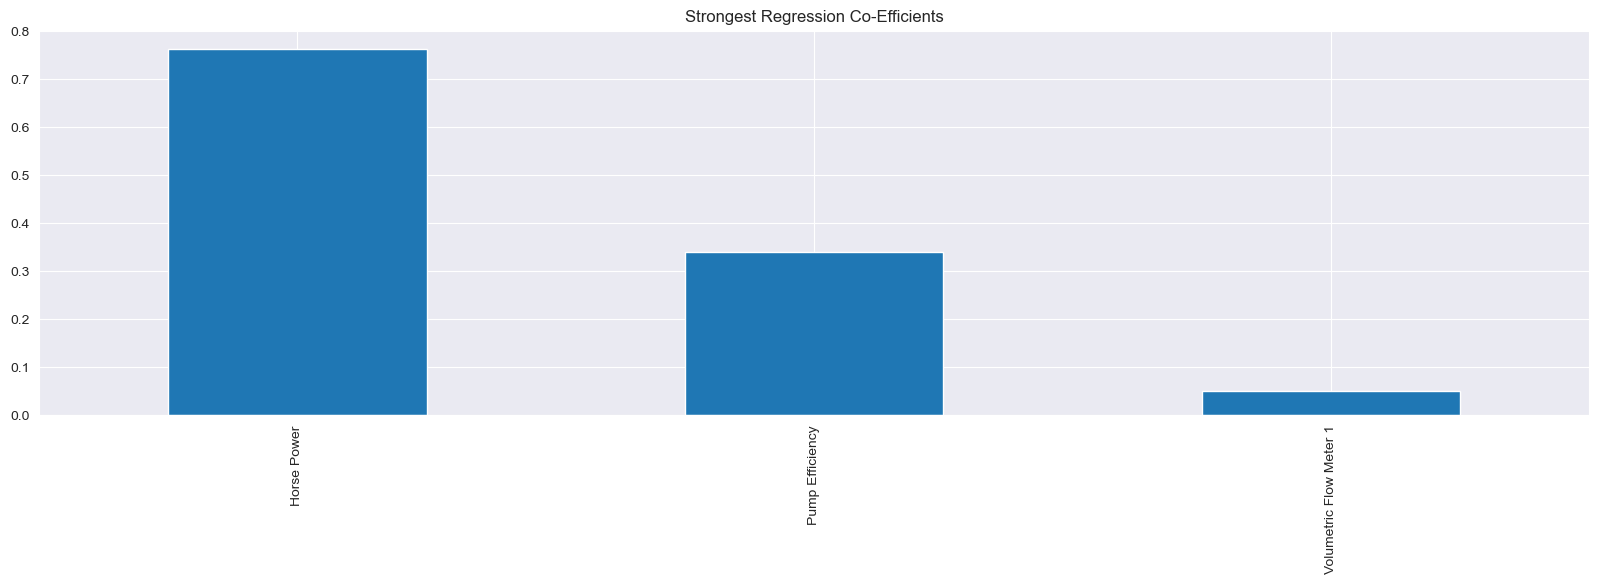

In [203]:
# Extract top 3 highest co-efficients of regression model
regression_model.params.sort_values(ascending=False).head(3).plot(kind='bar')
plt.title("Strongest Regression Co-Efficients")
plt.show()                    


### <span style="color:purple">Validate Predictions</span> 

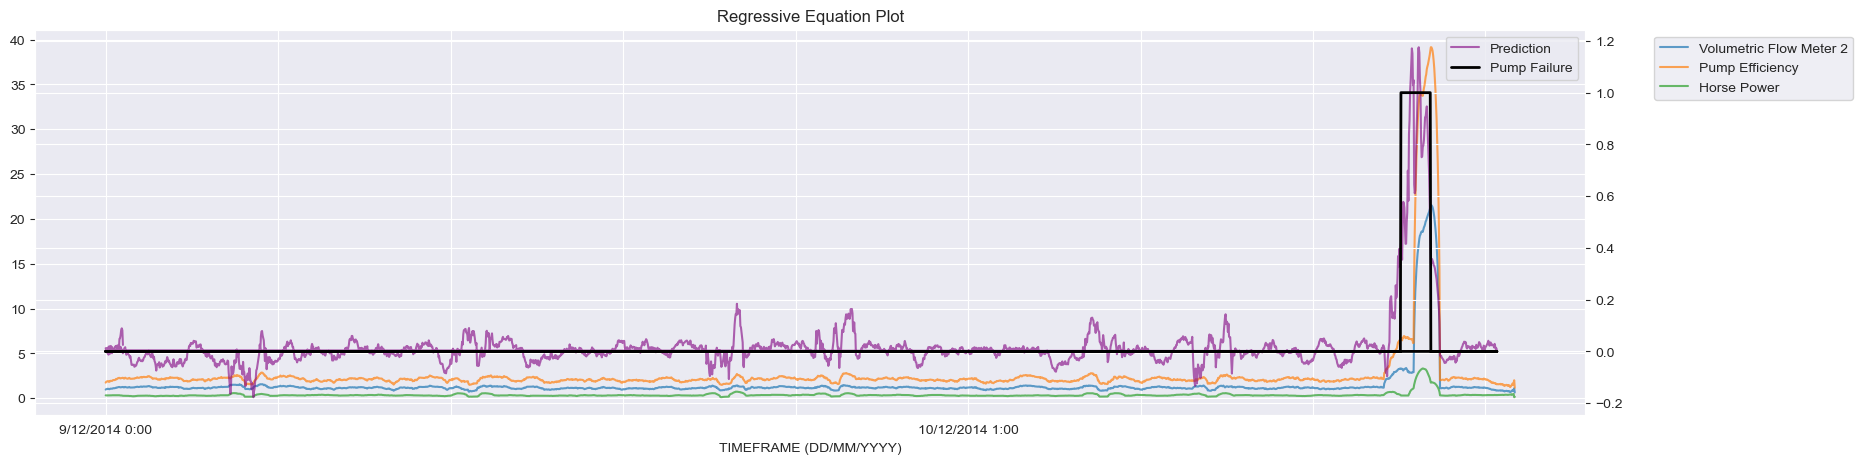

In [204]:
# Create column of regressive predictions
dataframe_stdev['Prediction'] = pd.DataFrame(regression_model.predict(independent_variables))

dataframe_stdev.set_index("TIMEFRAME (DD/MM/YYYY)", inplace=True)

# Plot independent variables
primary_axes = dataframe_stdev['Volumetric Flow Meter 2'].plot(alpha=0.7)
primary_axes = dataframe_stdev['Pump Efficiency'].plot(alpha=0.7)
primary_axes = dataframe_stdev['Horse Power'].plot(alpha=0.7)

# Create second axes with Prediction and Pump Failure
primary_axes.xaxis.set_major_locator(plt.MaxNLocator(10))
second_axes = primary_axes.twinx()
second_axes.plot(dataframe_stdev['Prediction'], color='purple', alpha=0.6, label='Prediction')
second_axes.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color='Black', linewidth=2, label='Pump Failure')
second_axes.xaxis.set_major_locator(plt.MaxNLocator(10))

second_axes.legend()
primary_axes.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Regressive Equation Plot")
plt.show()